Fraud Detertion Using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

General information about the data:

In [2]:
credit_card=pd.read_csv("creditcard.csv")
print(credit_card.head(5))
print(credit_card.dtypes)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class needed to be categorical.

In [3]:
credit_card["Class"]=credit_card["Class"].astype("category")

Let's see how many transactions are fraudulent.

Text(0.5, 1.0, 'Distribution of credit card frauds')

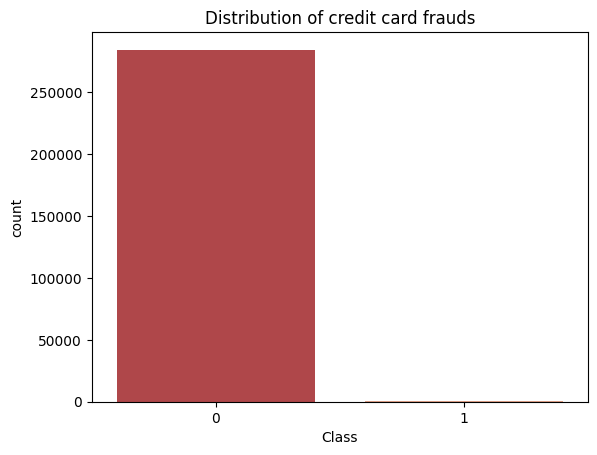

In [4]:
sns.set_palette("RdBu")
bar = sns.countplot(x=credit_card["Class"])
bar.set_title('Distribution of credit card frauds')

<AxesSubplot: title={'center': 'Time distribution of the data'}, ylabel='Frequency'>

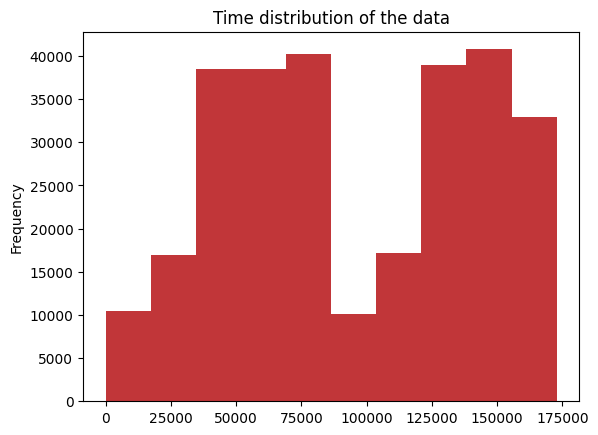

In [5]:
credit_card["Time"].plot(kind="hist",title="Time distribution of the data")

As soon as time isn't needed, it can be deleted.

In [6]:
credit_card=credit_card.drop("Time",axis=1)

Text(0.5, 1.0, 'Distribution of Transaction Amount')

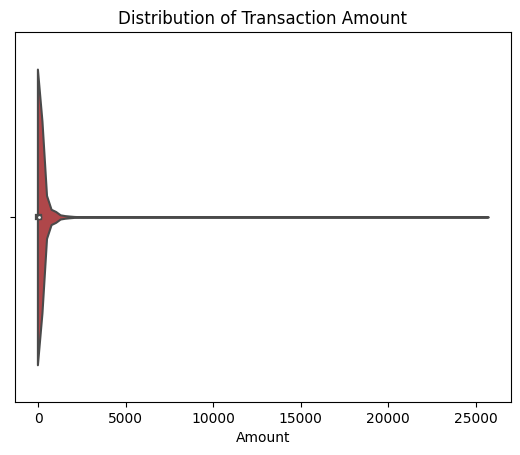

In [7]:
rel = sns.violinplot(x=credit_card["Amount"]) 
rel.set_title('Distribution of Transaction Amount')

Check if any Nan exist.

In [8]:
print(credit_card.isna().any().sum())

0


In [9]:
X = credit_card.drop("Class", axis=1).values
y=credit_card["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=41, stratify=y)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}

In [11]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    y_pred = model.predict(X_test_scaled)
    print(name)
    print("Confusion_matrix:\n",confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression
Confusion_matrix:
 [[113710     16]
 [    81    116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       0.88      0.59      0.71       197

    accuracy                           1.00    113923
   macro avg       0.94      0.79      0.85    113923
weighted avg       1.00      1.00      1.00    113923

KNN
Confusion_matrix:
 [[113713     13]
 [    52    145]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       0.92      0.74      0.82       197

    accuracy                           1.00    113923
   macro avg       0.96      0.87      0.91    113923
weighted avg       1.00      1.00      1.00    113923

Decision Tree
Confusion_matrix:
 [[113676     50]
 [    55    142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       0.74      0.72    

It seems among three algorithms knn works best.